<a href="https://colab.research.google.com/github/faiyazansariusa/ColabAI/blob/main/HF_transformer_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline

In [ ]:
from transformers import pipeline

In [ ]:
image_classifier=pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


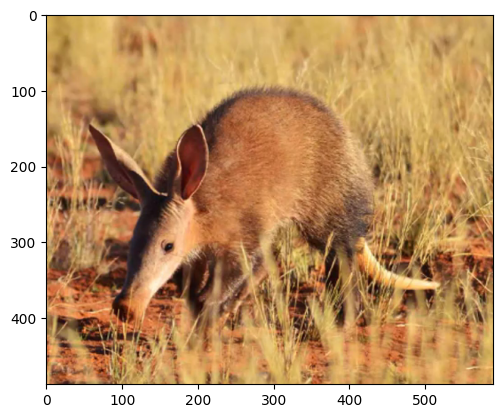

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
image=Image.open("/content/Ardavarks.png")
plt.imshow(image)

In [ ]:
image_classifier(image)

[{'label': 'armadillo', 'score': 0.9248367547988892},
 {'label': 'wallaby, brush kangaroo', 'score': 0.01961226388812065},
 {'label': 'wombat', 'score': 0.007883443497121334},
 {'label': 'grey fox, gray fox, Urocyon cinereoargenteus',
  'score': 0.0019158902578055859},
 {'label': 'badger', 'score': 0.0017430055886507034}]

[{'label': 'jacamar', 'score': 0.8395230770111084},
 {'label': 'bee eater', 'score': 0.09609637409448624},
 {'label': 'brambling, Fringilla montifringilla',
  'score': 0.011467392556369305},
 {'label': 'bulbul', 'score': 0.009654495865106583},
 {'label': 'coucal', 'score': 0.0038819964975118637}]

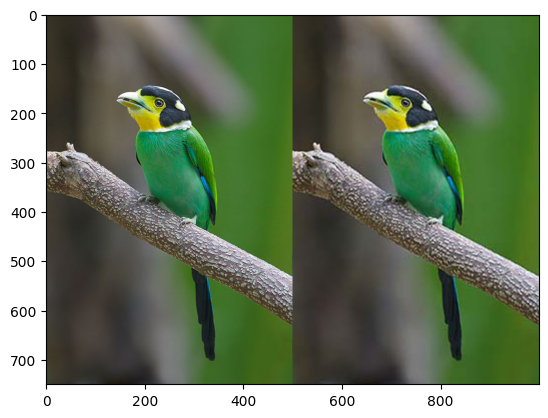

In [ ]:
# prompt: read the image from URL

import requests
from PIL import Image
from io import BytesIO

def read_image_from_url(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  return image

# Example usage:https://wallpaper.dog/large/10839712.jpg
#image_url = ""
image_url ="https://digitalcommunications.wp.st-andrews.ac.uk/files/2019/04/JPEG_compression_Example.jpg"
image = read_image_from_url(image_url)
plt.imshow(image)
image_classifier(image)

In [2]:
# prompt: deploy the above LLM with Gradio

!pip install -q gradio

import gradio as gr
import requests
from PIL import Image
from io import BytesIO
from transformers import pipeline

# Create the image classification pipeline
image_classifier = pipeline("image-classification")

def read_image_from_url(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  return image


def classify_image_from_url(image_url):
  image = read_image_from_url(image_url)
  results = image_classifier(image)
  # Format the results for Gradio Label output
  formatted_results = {item['label']: item['score'] for item in results}
  return formatted_results

iface = gr.Interface(fn=classify_image_from_url,
                     inputs=gr.Textbox(label="Enter Image URL"),
                     outputs=gr.Label(),
                     title="Image Classifier")
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://153668b07392582466.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://153668b07392582466.gradio.live


In [5]:
from transformers import pipeline
vqa=pipeline("vqa")

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [7]:
onlineImage="/content/Ardavarks.png"
vqa(image=onlineImage,question="What is in the picture?")

[{'score': 0.17839284241199493, 'answer': 'deer'},
 {'score': 0.03101467899978161, 'answer': 'bird'},
 {'score': 0.02075825445353985, 'answer': 'grass'},
 {'score': 0.01488613523542881, 'answer': 'goat'},
 {'score': 0.013759825378656387, 'answer': 'animal'}]

In [9]:
onlineImage="/content/Lion.png"
vqa(image=onlineImage,question="What is in clolour?")

[{'score': 0.3020007014274597, 'answer': 'bear'},
 {'score': 0.10427218675613403, 'answer': 'hair'},
 {'score': 0.04559490829706192, 'answer': 'fur'},
 {'score': 0.044817447662353516, 'answer': 'nothing'},
 {'score': 0.025662003085017204, 'answer': 'eyes'}]

In [10]:
# prompt: VQA code to idetify picture

vqa=pipeline("vqa")
onlineImage="/content/Ardavarks.png"
vqa(image=onlineImage,question="What is in the picture?")
onlineImage="/content/Lion.png"
vqa(image=onlineImage,question="What is in clolour?")

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'score': 0.30200085043907166, 'answer': 'bear'},
 {'score': 0.10427223891019821, 'answer': 'hair'},
 {'score': 0.045594874769449234, 'answer': 'fur'},
 {'score': 0.04481746628880501, 'answer': 'nothing'},
 {'score': 0.025662019848823547, 'answer': 'eyes'}]

In [12]:
# prompt: Add VQA along with image classification and deploy through gradio

def read_image_from_url(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  return image

def predict(image_url, question):
  from transformers import pipeline
  # Create the image classification pipeline
  image_classifier = pipeline("image-classification")
  vqa = pipeline("vqa")

  image = read_image_from_url(image_url)
  classification_results = image_classifier(image)
  vqa_results = vqa(image=image, question=question)

  # Format the results
  formatted_classification = {item['label']: item['score'] for item in classification_results}
  formatted_vqa = vqa_results[0]['answer'] # VQA usually returns a single answer

  return formatted_classification, formatted_vqa


iface = gr.Interface(fn=predict,
                     inputs=[gr.Textbox(label="Enter Image URL"), gr.Textbox(label="Enter Question for VQA")],
                     outputs=[gr.Label(label="Image Classification"), gr.Textbox(label="Visual Question Answering")],
                     title="Image Classifier and VQA")
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://21a9f15bda54bbec87.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu
No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image p

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://21a9f15bda54bbec87.gradio.live


In [13]:
# prompt: Allow me to provide button option to allow image classification or VQA and deploy through Gradio

def read_image_from_url(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  return image

# Create the image classification and VQA pipelines
image_classifier = pipeline("image-classification")
vqa = pipeline("vqa")

def process_image(image_url, question, task):
  image = read_image_from_url(image_url)
  if task == "Image Classification":
    classification_results = image_classifier(image)
    formatted_results = {item['label']: item['score'] for item in classification_results}
    return formatted_results, None # Return None for the VQA output
  elif task == "Visual Question Answering (VQA)":
    if not question:
        return None, "Please enter a question for VQA."
    vqa_results = vqa(image=image, question=question)
    formatted_vqa = vqa_results[0]['answer']
    return None, formatted_vqa # Return None for the Classification output
  else:
      return None, "Invalid task selected."

iface = gr.Interface(fn=process_image,
                     inputs=[gr.Textbox(label="Enter Image URL"),
                             gr.Textbox(label="Enter Question (for VQA)"),
                             gr.Radio(["Image Classification", "Visual Question Answering (VQA)"], label="Select Task")],
                     outputs=[gr.Label(label="Image Classification Results"),
                              gr.Textbox(label="VQA Answer")],
                     title="Image Analysis (Classification or VQA)")

iface.launch(debug=True)


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu
No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f11b4a81ac48291781.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f11b4a81ac48291781.gradio.live


In [14]:
# prompt: Add option to upload Image as well

def process_image(image_input, question, task):
  # Create the image classification and VQA pipelines if not already created
  global image_classifier, vqa
  if 'image_classifier' not in globals():
      image_classifier = pipeline("image-classification")
  if 'vqa' not in globals():
      vqa = pipeline("vqa")

  # Handle different input types: URL or uploaded image
  if isinstance(image_input, str): # Assuming string input is a URL
      response = requests.get(image_input)
      image = Image.open(BytesIO(response.content))
  else: # Assuming image_input is a PIL Image object from gradio.Image
      image = image_input

  if task == "Image Classification":
    classification_results = image_classifier(image)
    formatted_results = {item['label']: item['score'] for item in classification_results}
    return formatted_results, None # Return None for the VQA output
  elif task == "Visual Question Answering (VQA)":
    if not question:
        return None, "Please enter a question for VQA."
    vqa_results = vqa(image=image, question=question)
    formatted_vqa = vqa_results[0]['answer']
    return None, formatted_vqa # Return None for the Classification output
  else:
      return None, "Invalid task selected."

iface = gr.Interface(fn=process_image,
                     inputs=[gr.Image(type="pil", label="Upload Image or Enter Image URL"),
                             gr.Textbox(label="Enter Question (for VQA)"),
                             gr.Radio(["Image Classification", "Visual Question Answering (VQA)"], label="Select Task")],
                     outputs=[gr.Label(label="Image Classification Results"),
                              gr.Textbox(label="VQA Answer")],
                     title="Image Analysis (Classification or VQA)")

iface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d9abbb5e180c22a79d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d9abbb5e180c22a79d.gradio.live


In [16]:
# prompt: Instead of select task give option as tab for image classification and VQA

def process_image_tabs(image_input, question):
  # Create the image classification and VQA pipelines if not already created
  global image_classifier, vqa
  if 'image_classifier' not in globals():
      image_classifier = pipeline("image-classification")
  if 'vqa' not in globals():
      vqa = pipeline("vqa")

  # Handle different input types: URL or uploaded image
  if isinstance(image_input, str): # Assuming string input is a URL
      try:
        response = requests.get(image_input)
        image = Image.open(BytesIO(response.content))
      except:
          return "Invalid image URL provided.", None, None
  else: # Assuming image_input is a PIL Image object from gradio.Image
      image = image_input

  # Process for Classification (always run, output goes to its tab)
  classification_results = image_classifier(image)
  formatted_classification = {item['label']: item['score'] for item in classification_results}

  # Process for VQA (only if a question is provided, output goes to its tab)
  formatted_vqa = None
  if question:
      try:
          vqa_results = vqa(image=image, question=question)
          formatted_vqa = vqa_results[0]['answer']
      except Exception as e:
          formatted_vqa = f"Error processing VQA: {e}"


  return image, formatted_classification, formatted_vqa

with gr.Blocks() as demo:
    gr.Markdown("## Image Analysis (Classification and VQA)")
    with gr.Row():
        image_input = gr.Image(type="pil", label="Upload Image or Enter Image URL")
        question_input = gr.Textbox(label="Enter Question for VQA")
        analyze_button = gr.Button("Analyze Image")

    with gr.Tabs() as tabs:
        with gr.TabItem("Image Display"):
            image_output = gr.Image(label="Input Image")
        with gr.TabItem("Image Classification"):
            classification_output = gr.Label(label="Image Classification Results")
        with gr.TabItem("Visual Question Answering (VQA)"):
             vqa_output = gr.Textbox(label="VQA Answer")


    analyze_button.click(
        fn=process_image_tabs,
        inputs=[image_input, question_input],
        outputs=[image_output, classification_output, vqa_output]
    )

demo.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://930f6bf1fa620189a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://930f6bf1fa620189a7.gradio.live


In [18]:
# prompt: text generation

# Create a text generation pipeline
text_generator = pipeline("text-generation")

def generate_text(prompt, max_length=50, num_return_sequences=1):
  """Generates text based on a prompt."""
  generated_sequences = text_generator(
      prompt,
      max_length=max_length,
      num_return_sequences=num_return_sequences
  )
  # Extract and return the generated text
  return [seq['generated_text'] for seq in generated_sequences]

# Example usage:
prompt = "Once upon a time,"
generated_text = generate_text(prompt)
print(generated_text)

# Integrate with Gradio (optional)
# iface_textgen = gr.Interface(fn=lambda p: "\n".join(generate_text(p)),
#                              inputs=gr.Textbox(label="Enter a starting prompt"),
#                              outputs=gr.Textbox(label="Generated Text"),
#                              title="Text Generation")
# iface_textgen.launch(debug=True)



No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


['Once upon a time, the story was a little different than it is now. The "drummer" wasn\'t all that important, nor was he a major player in the company\'s history. Perhaps some of the original story elements had been discarded, perhaps the rest of the story was written by newcomers.\n\nPerhaps, maybe not. It was a different story without him.\n\nWhen they said that, we were told that it was a more complex story.\n\nThat\'s right, it was different than the previous version.\n\nWe were told that it was a more complex story.\n\nThat was the story that we were told.\n\nBut the story didn\'t end.\n\nAnd thus, we have the story that we thought we\'d found.\n\nNow, let me tell you about that story.\n\nThe story begins on the night of December 25th, 1967, with the arrival of General Jens von Braun.\n\nThe General was in Germany to help the troops of the USA, to assist the other nations in the war against the Nazis.\n\nGeneral von Braun was in charge of the U.S. Strategic Air Command, and he wa

In [19]:
generator=pipeline("text-generation" )
generator("In this genai intermediate course,we will learn about",max_length=150)


No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this genai intermediate course,we will learn about the use of the term "takkun," or "to say." In order to use this term in Chinese, we will need to understand and understand the nature of takkun, the Chinese concept of takkun, and the way the word "takkun" is translated. Here is a brief synopsis of the basics of takkun and more details on the basic concepts of takkun.\n\nThe Basic Takkun Concept\n\nThe basic takkun concept is the concept of "takkun" (pronounced "tak-uh-kuh") that is derived from the "tak" in the Korean language.\n\nThe concept is not limited to Korean, it is also found in English, French, Japanese, German, Italian, Korean, and Chinese. The concept also seems to be a kind of "narrative" of words or phrases.\n\nTakkun is a word for "to say" or "to show" (落, "to say" or "to show") or even "to say."\n\nTakkun is used in Chinese as a verb, meaning "to say," "to say", "to say," "to say."\n\nTakkun'}]

In [23]:
generator=pipeline("text-generation",model="distilgpt2" )
generator("In this genai intermediate course,we will learn about",max_length=150)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this genai intermediate course,we will learn about the various mechanisms that contribute to the formation of the new age:\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'}]

In [24]:
generator("Once Upon a time there was thirsty crow",max_length=150)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Once Upon a time there was thirsty crow, and the crow was running to his side, and he had a great deal of power to himself.\n\n\nThe crow's eyes were glowing with white light, light, and light, and he thought, as though he were seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man, and seeing a man,

In [25]:
generator("I am a doctor and i work as",max_length=150)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'I am a doctor and i work as a nurse. i am in a medical school, so i do not need to write for a specialist. i dont have any medical knowledge, but i have a doctor. i am not a doctor. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i am a nurse. i'}]

In [29]:
generator=pipeline("text-generation",model="distilgpt2" )
generator("I am working as Doctor ",max_length=10,temperature=0.2)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'I am working as Doctor !!\n\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI am a Doctor!!!\nI'}]

In [30]:
generator("I am working as Doctor",max_length=10,temperature=0.8)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "I am working as Doctor Who Agent. I am looking forward to my adventures as a Doctor Who fan and a Doctor Who fan.\n\nAnd so here is the latest part of the Doctor Who story line from the series, which I started in 2014.\nI have two sons, and they've been married for over two years. We have three children (my two sons still live in London and a son was born in 2011). They have a son who is still a Doctor Who fan.\nI can't help but feel sad to see the fact that my son has been diagnosed with a heart attack, and our family could not possibly enjoy the opportunity to be a Doctor Who fan in Britain."}]

In [31]:
generator("I am working as Doctor",max_length=10,temperature=0.2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=10) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'I am working as Doctor Who’s new Doctor Who fan.”\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'}]

In [32]:
## Chatbot  question answering  system
qa=pipeline("question-answering")



No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [34]:
context="or a typical adult, body temperature can be anywhere from 97 F to 99 F. Adults over the age of 60 tend to have a lower body temperature, compared to younger adults. Babies and children have a wider range: 95.9 F to 99.5 F (if measured with an oral thermometer) or 97.9 F to 100.4 F (if measured by a rectal thermometer). "
question="What is body temperature that considered as Fever?"
qa(question=question,context=context)

{'score': 0.7807988524436951, 'start': 58, 'end': 70, 'answer': '97 F to 99 F'}

In [35]:
context="or a typical adult, body temperature can be anywhere from 97 F to 99 F. Adults over the age of 60 tend to have a lower body temperature, compared to younger adults. Babies and children have a wider range: 95.9 F to 99.5 F (if measured with an oral thermometer) or 97.9 F to 100.4 F (if measured by a rectal thermometer). "
question="What is Machine learning?"
qa(question=question,context=context)

{'score': 0.02466409280896187,
 'start': 165,
 'end': 203,
 'answer': 'Babies and children have a wider range'}

In [38]:
qa = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [39]:
langtrans=pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")
langtrans("I am a doctor and i work as")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


[{'translation_text': 'Ich bin Arzt und arbeite als'}]

In [47]:
imgtotext=pipeline("image-to-text")

imgtotext("https://digitalcommunications.wp.st-andrews.ac.uk/files/2019/04/JPEG_compression_Example.jpg")


No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 5bebf1e (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'generated_text': 'two colorful birds sitting on a branch '}]